In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('./../../datasets/SWEETWATER CREEK.csv',header=0, parse_dates=['time'])

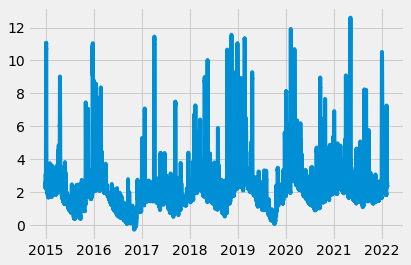

In [4]:
df["time"] = pd.to_datetime(df['time'])
df = df.set_index('time')
plt.plot(df.index,df["height"])

In [5]:
train_set = df[:'2020'].iloc[:,:]
test_set = df['2021':].iloc[:,:]

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(train_set)

In [7]:
len(training_set_scaled)

207103

In [8]:
X_train = []
y_train = []
for i in range(100,len(training_set_scaled)):
    X_train.append(training_set_scaled[i-100:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [9]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [10]:
X_train.shape

(207003, 100, 1)

In [11]:
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [12]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='loss', patience=8)

In [13]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [14]:
def Wape(y, y_pred):
    """Weighted Average Percentage Error metric in the interval [0; 100]"""
    nominator = tf.reduce_sum(tf.abs(tf.subtract(y, y_pred)))
    denominator = tf.add(tf.reduce_sum(tf.abs(y)), K.epsilon())
    wape = tf.scalar_mul(100.0, tf.divide(nominator, denominator))
    return wape


# Load Model

In [15]:
from tensorflow import keras
LSTM = keras.models.load_model('Sweatwater-LSTM.h5',custom_objects={"Wape": Wape})

CNN = keras.models.load_model('Sweatwater-CNN.h5',custom_objects={"Wape": Wape})

Dense = keras.models.load_model('Sweatwater-Dense.h5',custom_objects={"Wape": Wape})

2022-04-13 09:55:34.453287: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [38]:
train_set = df[:'2020'].iloc[:,:]
test_set = df['2022-02-07 05':].iloc[:,:]

In [39]:
from itertools import chain
#flatten_list = list(chain.from_iterable(Denseprediction.tolist()))

Test_df = df['2022-02-07 05':].iloc[:,:]

In [36]:
train_set = df[:].iloc[:,:]
test_set = df[100:].iloc[:,:]

In [20]:
from itertools import chain
#flatten_list = list(chain.from_iterable(Denseprediction.tolist()))

Test_df = df[100:].iloc[:,:]

In [40]:
inputs = df[len(df) - len(test_set) - 100:].values
#df[len(df) - len(test_set) - 100:]

In [41]:
inputs.shape

(340, 1)

In [42]:
inputs = sc.fit_transform(inputs)
# inputs

In [43]:
# Preparing X_test and predicting the prices 
from numpy import savetxt

X_test = []
for i in range(100,len(inputs)):
    X_test.append(inputs[i-100:i,0])
X_test = np.array(X_test)
#savetxt('data.csv', X_test, delimiter=',')
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
LSTMprediction = LSTM.predict(X_test)
LSTMprediction = sc.inverse_transform(LSTMprediction)

In [44]:
# Preparing X_test and predicting the prices 
from numpy import savetxt

X_test = []
for i in range(100,len(inputs)):
    X_test.append(inputs[i-100:i,0])
X_test = np.array(X_test)
#savetxt('data.csv', X_test, delimiter=',')
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
CNNprediction = CNN.predict(X_test)
CNNprediction = sc.inverse_transform(CNNprediction)

In [45]:
# Preparing X_test and predicting the prices 
from numpy import savetxt

X_test = []
for i in range(100,len(inputs)):
    X_test.append(inputs[i-100:i,0])
X_test = np.array(X_test)
#savetxt('data.csv', X_test, delimiter=',')
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
Denseprediction = Dense.predict(X_test)
Denseprediction = sc.inverse_transform(Denseprediction)

In [46]:
# Evaluating our model
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from math import sqrt
import tensorflow.keras.backend as K
import hydroeval as he


def wape(y, y_pred):
    """Weighted Average Percentage Error metric in the interval [0; 100]"""
    nominator = tf.reduce_sum(tf.abs(tf.subtract(y, y_pred)))
    denominator = tf.add(tf.reduce_sum(tf.abs(y)), K.epsilon())
    wape = tf.scalar_mul(100.0, tf.divide(nominator, denominator))
    return wape

def Performance(test,Dense,CNN,LSTM):
    #print("Nash-Sutcliffe Efficiency:",nse)
#     print("Dense")
#     print("MSE:",MSE(test,Dense))
#     print("MAE:",MAE(test,Dense))
#     rmse = sqrt(MSE(test, Dense))
#     print("RMSE:",rmse)
#     print("MAPE:",MAPE(test,Dense))
#     nse = he.evaluator(he.nse, Dense, test)
#     print("NSE:",nse)
#     print("WAPE:",wape(test,Dense))

#     print("\n\nCNN")
#     print("MSE:",MSE(test,CNN))
#     print("MAE:",MAE(test,CNN))
#     rmse = sqrt(MSE(test, CNN))
#     print("RMSE:",rmse)
#     nse = he.evaluator(he.nse, CNN, test)
#     print("NSE:",nse)
#     print("MAPE:",MAPE(test,CNN))
#     print("WAPE:",wape(test,CNN))
    
    
#     print("\n\nLSTM")
#     print("MSE:",MSE(test,LSTM))
#     print("MAE:",MAE(test,LSTM))
#     rmse = sqrt(MSE(test, LSTM))
#     print("RMSE:",rmse)
#     nse = he.evaluator(he.nse, LSTM, test)
#     print("NSE:",nse)
#     print("MAPE:",MAPE(test,LSTM))
#     print("WAPE:",wape(test,LSTM))


    print("Dense")
    print(MSE(test,Dense))
    print(MAE(test,Dense))
    nse = he.evaluator(he.nse, Dense, test)
    print(nse)
    print(wape(test,Dense))

    print("\n\nCNN")
    print(MSE(test,CNN))
    print(MAE(test,CNN))
    nse = he.evaluator(he.nse, CNN, test)
    print(nse)
    print(wape(test,CNN))
    
    print("\n\nLSTM")
    print(MSE(test,LSTM))
    print(MAE(test,LSTM))
    nse = he.evaluator(he.nse, LSTM, test)
    print(nse)
    print("WAPE:",wape(test,LSTM))

# Historical Plot

In [32]:
import math
from sklearn.metrics import mean_squared_error
from matplotlib.axes import Axes as ax
import datetime
# Some functions to help out with
from matplotlib.pyplot import figure
def plot_predictions(test,LSTMpredicted, CNN, Dense):
    fig, ax = plt.subplots(figsize=(20,30), tight_layout=True)
    plt.xticks(rotation=45)
    ax.plot(Test_df[:].index, test,color='black',label='Obsevervation',marker='s')
    ax.plot(Test_df[:].index, LSTMpredicted,color='red',label='LSTM Prediction',linewidth=4,marker='o')
    ax.plot(Test_df[:].index, Dense, color='plum',label='Dense Prediction',marker='D', linestyle=":")
    ax.plot(Test_df[:].index, CNN, color='burlywood',label='CNN Prediction',marker='o',linestyle="-.")
    #ax.plot(df[len(df) - len(test_set) - 100:][90:101].index, df[len(df) - len(test_set) - 101:][90:101].values,color='dimgrey',label='Random Data input',marker='s')
    plt.xlabel('Date',{'fontname':'monospace'})
    plt.ylabel('Gage height (ft)')
    plt.legend(loc="lower left")
    
    # inset axes....
    axins = ax.inset_axes([0.3, 0.90, 0.3, 0.1])
    axins.plot(Test_df[:].index, test[:],color='black',label='Obsevervation',marker='s')
    axins.plot(Test_df[:].index, LSTMpredicted,color='red',label='LSTM Prediction',linewidth=4,marker='o')
    axins.plot(Test_df[:].index, Dense, color='plum',label='Dense Prediction',marker='D', linestyle=":")
    axins.plot(Test_df[:].index, CNN, color='burlywood',label='CNN Prediction',marker='o',linestyle="-.")
    #axins.plot(df[len(df) - len(test_set) - 100:][90:101].index, df[len(df) - len(test_set) - 101:][90:101].values,color='dimgrey',label='Random Data input',marker='s')
    axins.grid(False)
    # sub region of the original image
    x1, x2, y1, y2 = Test_df[:].index[5000],Test_df[:].index[50000], 0, 11.5
    
    axins.set_xlabel('Date',{'fontname':'monospace'})
    axins.set_ylabel('Gage height (ft)')
    axins.set_xlim(x1, x2)
    axins.set_ylim(y1,y2)
    axins.tick_params(labelrotation=45)
    # axins.set_xticklabels([])
    # axins.set_yticklabels([])
    for i in range(100):
        ax.indicate_inset_zoom(axins, edgecolor="midnightblue",alpha=1)

    
    ax.indicate_inset_zoom(axins, edgecolor="midnightblue",alpha=0.2,facecolor="red")
    
    axins.spines['bottom'].set_color('0.5')
    axins.spines['top'].set_color('0.5')
    axins.spines['right'].set_color('0.5')
    axins.spines['left'].set_color('0.5')
    
    plt.savefig("Mathplot.png",bbox_inches='tight')
    plt.show()
    


def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

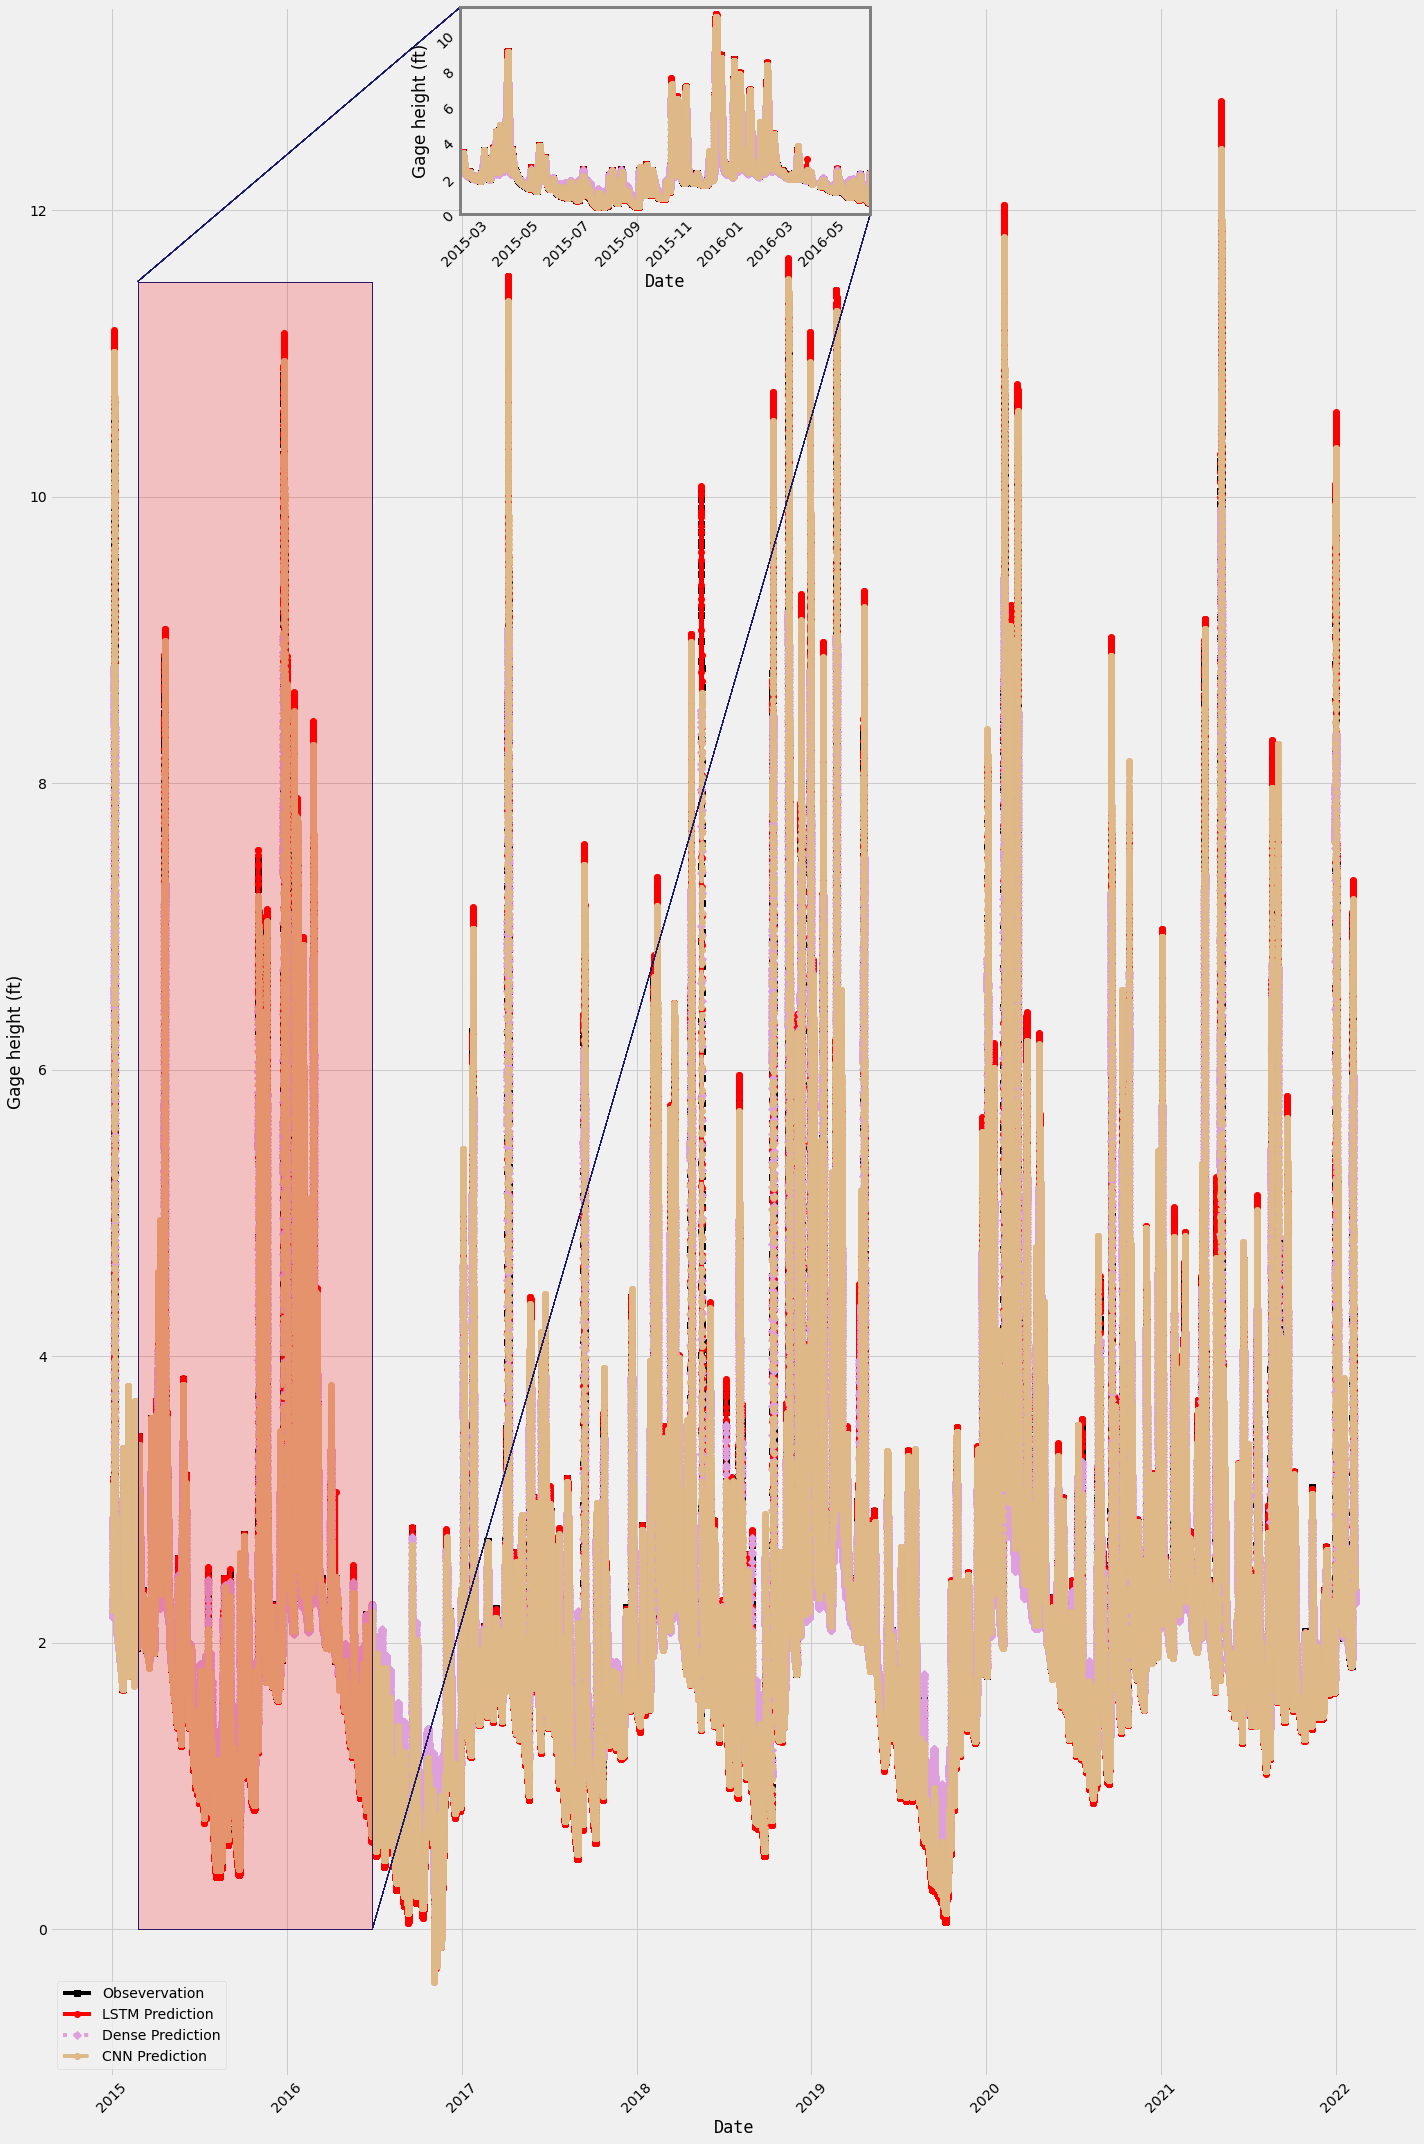

In [33]:
plot_predictions(test_set[:],LSTMprediction[:],CNNprediction[:],Denseprediction[:])

## 48 Hrs

In [49]:
import math
from sklearn.metrics import mean_squared_error
from matplotlib.axes import Axes as ax
import datetime
# Some functions to help out with
from matplotlib.pyplot import figure
def plot_predictions(test,LSTMpredicted, CNN, Dense):
    fig, ax = plt.subplots(figsize=(20,15), tight_layout=True)
    plt.xticks(rotation=45)
    ax.plot(Test_df[:192].index, test[:192],color='black',label='Obsevervation',marker='s')
    ax.plot(Test_df[:192].index, LSTMpredicted,color='red',label='LSTM Prediction',linewidth=4,marker='o')
    ax.plot(Test_df[:192].index, Dense, color='plum',label='Dense Prediction',marker='D', linestyle=":")
    ax.plot(Test_df[:192].index, CNN, color='burlywood',label='CNN Prediction',marker='o',linestyle="-.")
    ax.plot(df[len(df) - len(test_set) - 100:][90:101].index, df[len(df) - len(test_set) - 101:][90:101].values,color='dimgrey',label='Random Data input',marker='s')
    plt.xlabel('Date',{'fontname':'monospace'})
    plt.ylabel('Gage height (ft)')
    plt.legend(loc="lower left",prop={'size': 20})
    
    # inset axes....
    axins = ax.inset_axes([0.6, 0.58, 0.3, 0.4])
    axins.plot(Test_df[:192].index, test[:192],color='black',label='Obsevervation',marker='s')
    axins.plot(Test_df[:192].index, LSTMpredicted,color='red',label='LSTM Prediction',linewidth=4,marker='o')
    axins.plot(Test_df[:192].index, Dense, color='plum',label='Dense Prediction',marker='D', linestyle=":")
    axins.plot(Test_df[:192].index, CNN, color='burlywood',label='CNN Prediction',marker='o',linestyle="-.")
    axins.plot(df[len(df) - len(test_set) - 100:][90:101].index, df[len(df) - len(test_set) - 101:][90:101].values,color='dimgrey',label='Random Data input',marker='s')
    axins.grid(False)
    # sub region of the original image
    x1, x2, y1, y2 = Test_df[:192].index[50],Test_df[:192].index[100], 2.64, 3.05

    axins.set_xlim(x1, x2)
    axins.set_ylim(y1,y2)
    axins.tick_params(labelrotation=45)
    axins.set_xlabel('Date',{'fontname':'monospace'})
    axins.set_ylabel('Gage height (ft)')
    # axins.set_xticklabels([])
    # axins.set_yticklabels([])
    for i in range(100):
        ax.indicate_inset_zoom(axins, edgecolor="midnightblue",alpha=1)

    
    ax.indicate_inset_zoom(axins, edgecolor="midnightblue",alpha=0.2,facecolor="red")
    
    axins.spines['bottom'].set_color('0.5')
    axins.spines['top'].set_color('0.5')
    axins.spines['right'].set_color('0.5')
    axins.spines['left'].set_color('0.5')
    
    plt.savefig("48hrs-sweetwater.png",bbox_inches='tight')
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [ ]:
# Visualizing the results for LSTM 
plot_predictions(test_set[:192],LSTMprediction[:192],CNNprediction[:192],Denseprediction[:192])

## 24 Hrs

In [136]:
import math
from sklearn.metrics import mean_squared_error
from matplotlib.axes import Axes as ax
import datetime
# Some functions to help out with
from matplotlib.pyplot import figure
def plot_predictions(test,LSTMpredicted, CNN, Dense):
    fig, ax = plt.subplots(figsize=(20,5), tight_layout=True)
    plt.xticks(rotation=45)
    ax.plot(Test_df[0:96].index, test,color='black',label='Obsevervation',marker='s')
    ax.plot(Test_df[0:96].index, LSTMpredicted,color='red',label='LSTM Prediction',linewidth=4,marker='o')
    ax.plot(Test_df[0:96].index, Dense, color='plum',label='Dense Prediction',marker='D', linestyle=":")
    ax.plot(Test_df[0:96].index, CNN, color='burlywood',label='CNN Prediction',marker='o',linestyle="-.")
    ax.plot(df[len(df) - len(test_set) - 100:][90:101].index, df[len(df) - len(test_set) - 101:][90:101].values,color='dimgrey',label='Random Data input',marker='s')
    plt.xlabel('Date',{'fontname':'monospace'})
    plt.ylabel('Gage height (ft)')
    plt.legend(loc="lower left")
    
#     # inset axes....
#     axins = ax.inset_axes([0.6, 0.58, 0.3, 0.4])
#     axins.plot(Test_df[93:189].index, test[93:189],color='black',label='Obsevervation',marker='s')
#     axins.plot(Test_df[93:189].index, LSTMpredicted,color='red',label='LSTM Prediction',linewidth=4,marker='o')
#     axins.plot(Test_df[93:189].index, Dense, color='plum',label='Dense Prediction',marker='D', linestyle=":")
#     axins.plot(Test_df[93:189].index, CNN, color='burlywood',label='CNN Prediction',marker='o',linestyle="-.")
#     #axins.plot(df[len(df) - len(test_set) - 100:][90:101].index, df[len(df) - len(test_set) - 101:][90:101].values,color='dimgrey',label='Random Data input',marker='s')
#     axins.grid(False)
#     # sub region of the original image
#     x1, x2, y1, y2 = Test_df[:192].index[50],Test_df[:192].index[100], 23.5, 25.3

#     axins.set_xlim(x1, x2)
#     axins.set_ylim(y1,y2)
#     axins.tick_params(labelrotation=45)
#     # axins.set_xticklabels([])
#     # axins.set_yticklabels([])
#     for i in range(100):
#         ax.indicate_inset_zoom(axins, edgecolor="midnightblue",alpha=1)

    
#     ax.indicate_inset_zoom(axins, edgecolor="midnightblue",alpha=0.2,facecolor="red")
    
#     axins.spines['bottom'].set_color('0.5')
#     axins.spines['top'].set_color('0.5')
#     axins.spines['right'].set_color('0.5')
#     axins.spines['left'].set_color('0.5')
    
#     plt.savefig("Mathplot.png",bbox_inches='tight')
    plt.show()
    
    Performance(test,Dense, CNN, LSTMpredicted)

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [137]:
def nse(predictions, targets):
    return (1-(np.sum((predictions-targets)**2)/np.sum((targets-np.mean(targets))**2)))
print(nse(Denseprediction[192:240],test_set[192:240]))

height   -22.873075
dtype: float64


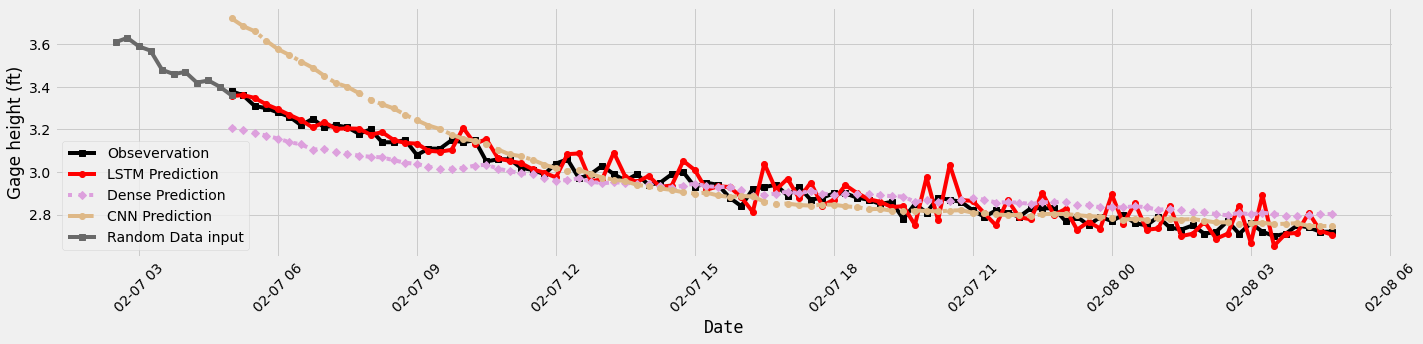

Dense
0.005604435196173485
0.06280212352673213
[0.81892961]
tf.Tensor(2.1356726377720903, shape=(), dtype=float64)


CNN
0.012515143152527724
0.07193216502666473
[0.59565562]
tf.Tensor(2.4461522635896777, shape=(), dtype=float64)


LSTM
0.0036863375684072206
0.04695413450400034
[0.88090029]
WAPE: tf.Tensor(1.5967399613132454, shape=(), dtype=float64)


In [138]:
# Visualizing the results for LSTM 
plot_predictions(test_set[0:96],LSTMprediction[0:96],CNNprediction[0:96],Denseprediction[0:96])

## 12 Hrs

In [130]:
import math
from sklearn.metrics import mean_squared_error
from matplotlib.axes import Axes as ax
import datetime
# Some functions to help out with
from matplotlib.pyplot import figure
def plot_predictions(test,LSTMpredicted, CNN, Dense):
    fig, ax = plt.subplots(figsize=(20,5), tight_layout=True)
    plt.xticks(rotation=45)
    ax.plot(Test_df[0:48].index, test,color='black',label='Obsevervation',marker='s')
    ax.plot(Test_df[0:48].index, LSTMpredicted,color='red',label='LSTM Prediction',linewidth=4,marker='o')
    ax.plot(Test_df[0:48].index, Dense, color='plum',label='Dense Prediction',marker='D', linestyle=":")
    ax.plot(Test_df[0:48].index, CNN, color='burlywood',label='CNN Prediction',marker='o',linestyle="-.")
    #ax.plot(df[len(df) - len(test_set) - 100:][90:101].index, df[len(df) - len(test_set) - 101:][90:101].values,color='dimgrey',label='Random Data input',marker='s')
    plt.xlabel('Date',{'fontname':'monospace'})
    plt.ylabel('Gage height (ft)')
    plt.legend(loc="lower left")
    
#     # inset axes....
#     axins = ax.inset_axes([0.6, 0.58, 0.3, 0.4])
#     axins.plot(Test_df[93:189].index, test[93:189],color='black',label='Obsevervation',marker='s')
#     axins.plot(Test_df[93:189].index, LSTMpredicted,color='red',label='LSTM Prediction',linewidth=4,marker='o')
#     axins.plot(Test_df[93:189].index, Dense, color='plum',label='Dense Prediction',marker='D', linestyle=":")
#     axins.plot(Test_df[93:189].index, CNN, color='burlywood',label='CNN Prediction',marker='o',linestyle="-.")
#     #axins.plot(df[len(df) - len(test_set) - 100:][90:101].index, df[len(df) - len(test_set) - 101:][90:101].values,color='dimgrey',label='Random Data input',marker='s')
#     axins.grid(False)
#     # sub region of the original image
#     x1, x2, y1, y2 = Test_df[:192].index[50],Test_df[:192].index[100], 23.5, 25.3

#     axins.set_xlim(x1, x2)
#     axins.set_ylim(y1,y2)
#     axins.tick_params(labelrotation=45)
#     # axins.set_xticklabels([])
#     # axins.set_yticklabels([])
#     for i in range(100):
#         ax.indicate_inset_zoom(axins, edgecolor="midnightblue",alpha=1)

    
#     ax.indicate_inset_zoom(axins, edgecolor="midnightblue",alpha=0.2,facecolor="red")
    
#     axins.spines['bottom'].set_color('0.5')
#     axins.spines['top'].set_color('0.5')
#     axins.spines['right'].set_color('0.5')
#     axins.spines['left'].set_color('0.5')
    
#     plt.savefig("Mathplot.png",bbox_inches='tight')
    plt.show()
    
    Performance(test,Dense, CNN, LSTMpredicted)

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [131]:
Performance(test_set[0:48],Denseprediction[0:48],CNNprediction[0:48],LSTMprediction[0:48])

Dense
0.007482131563717316
0.0728849889834722
[0.57457254]
tf.Tensor(2.3641569596178593, shape=(), dtype=float64)


CNN
0.02370450015709114
0.11263792097568515
[-0.34781715]
tf.Tensor(3.6536154907279843, shape=(), dtype=float64)


LSTM
0.002297269199586302
0.03684260904788971
[0.86937928]
WAPE: tf.Tensor(1.1950569219513778, shape=(), dtype=float64)


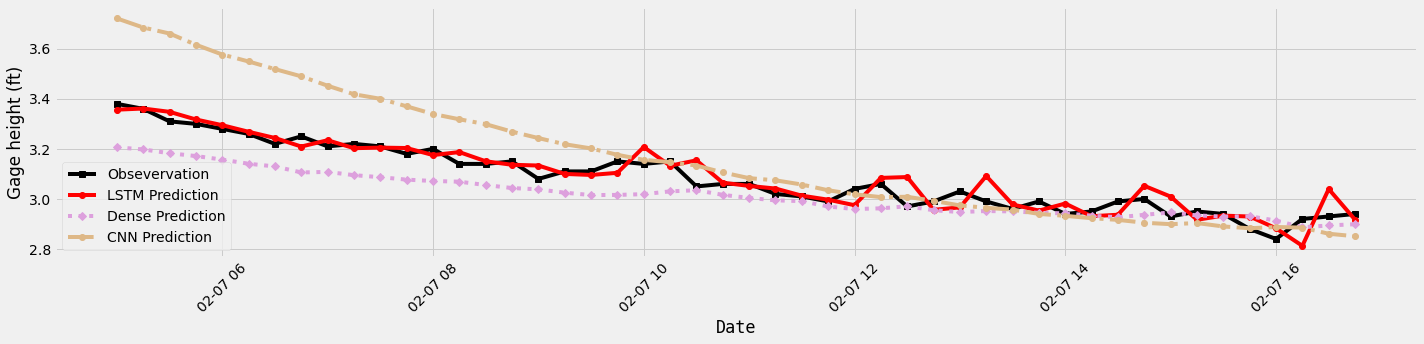

Dense
0.007482131563717316
0.0728849889834722
[0.57457254]
tf.Tensor(2.3641569596178593, shape=(), dtype=float64)


CNN
0.02370450015709114
0.11263792097568515
[-0.34781715]
tf.Tensor(3.6536154907279843, shape=(), dtype=float64)


LSTM
0.002297269199586302
0.03684260904788971
[0.86937928]
WAPE: tf.Tensor(1.1950569219513778, shape=(), dtype=float64)


In [132]:
# Visualizing the results for LSTM 
plot_predictions(test_set[0:48],LSTMprediction[0:48],CNNprediction[0:48],Denseprediction[0:48])

### Test

In [27]:
import math
from sklearn.metrics import mean_squared_error
from matplotlib.axes import Axes as ax
import datetime
# Some functions to help out with
from matplotlib.pyplot import figure
def plot_predictions(test,LSTMpredicted, CNN, Dense):
    fig, ax = plt.subplots(figsize=(20,5), tight_layout=True)
    plt.xticks(rotation=45)
    ax.plot(Test_df[100:150].index, test,color='black',label='Obsevervation',marker='s')
    ax.plot(Test_df[100:150].index, LSTMpredicted,color='red',label='LSTM Prediction',linewidth=4,marker='o')
    ax.plot(Test_df[100:150].index, Dense, color='plum',label='Dense Prediction',marker='D', linestyle=":")
    ax.plot(Test_df[100:150].index, CNN, color='burlywood',label='CNN Prediction',marker='o',linestyle="-.")
    #ax.plot(df[len(df) - len(test_set) - 100:][90:101].index, df[len(df) - len(test_set) - 101:][90:101].values,color='dimgrey',label='Random Data input',marker='s')
    plt.xlabel('Date',{'fontname':'monospace'})
    plt.ylabel('Gage height (ft)')
    plt.legend(loc="lower left")
    
#     # inset axes....
#     axins = ax.inset_axes([0.6, 0.58, 0.3, 0.4])
#     axins.plot(Test_df[93:189].index, test[93:189],color='black',label='Obsevervation',marker='s')
#     axins.plot(Test_df[93:189].index, LSTMpredicted,color='red',label='LSTM Prediction',linewidth=4,marker='o')
#     axins.plot(Test_df[93:189].index, Dense, color='plum',label='Dense Prediction',marker='D', linestyle=":")
#     axins.plot(Test_df[93:189].index, CNN, color='burlywood',label='CNN Prediction',marker='o',linestyle="-.")
#     #axins.plot(df[len(df) - len(test_set) - 100:][90:101].index, df[len(df) - len(test_set) - 101:][90:101].values,color='dimgrey',label='Random Data input',marker='s')
#     axins.grid(False)
#     # sub region of the original image
#     x1, x2, y1, y2 = Test_df[:192].index[50],Test_df[:192].index[100], 23.5, 25.3

#     axins.set_xlim(x1, x2)
#     axins.set_ylim(y1,y2)
#     axins.tick_params(labelrotation=45)
#     # axins.set_xticklabels([])
#     # axins.set_yticklabels([])
#     for i in range(100):
#         ax.indicate_inset_zoom(axins, edgecolor="midnightblue",alpha=1)

    
#     ax.indicate_inset_zoom(axins, edgecolor="midnightblue",alpha=0.2,facecolor="red")
    
#     axins.spines['bottom'].set_color('0.5')
#     axins.spines['top'].set_color('0.5')
#     axins.spines['right'].set_color('0.5')
#     axins.spines['left'].set_color('0.5')
    
#     plt.savefig("Mathplot.png",bbox_inches='tight')
    plt.show()
    
    #Performance(test,Dense, CNN, LSTMpredicted)

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

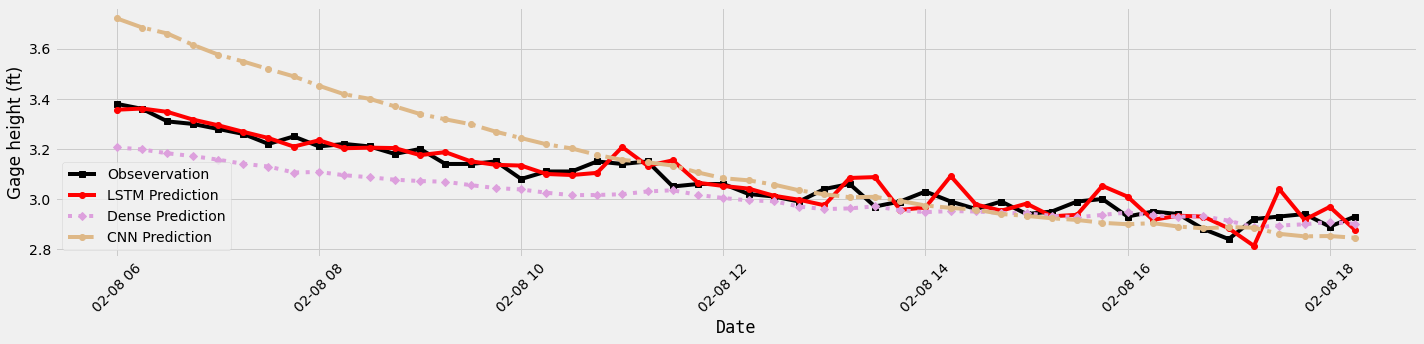

In [28]:
plot_predictions(test_set[0:50],LSTMprediction[0:50],CNNprediction[0:50],Denseprediction[0:50])

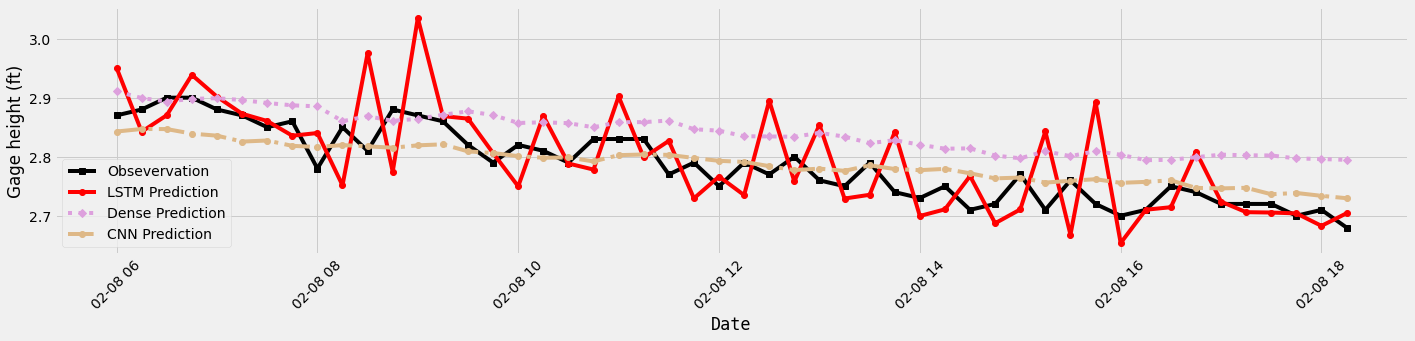

In [29]:
plot_predictions(test_set[50:100],LSTMprediction[50:100],CNNprediction[50:100],Denseprediction[50:100])

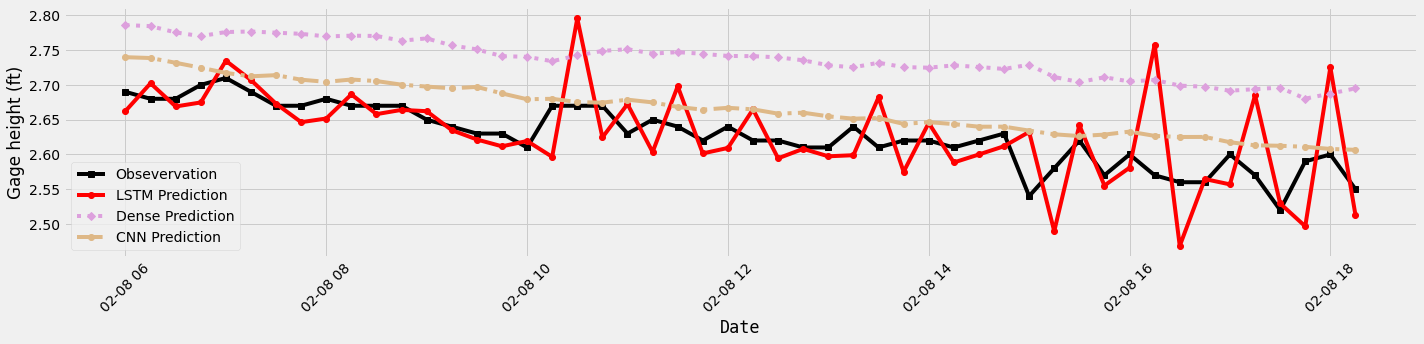

In [30]:
plot_predictions(test_set[100:150],LSTMprediction[100:150],CNNprediction[100:150],Denseprediction[100:150])

## 6 hrs

In [134]:
import math
from sklearn.metrics import mean_squared_error
from matplotlib.axes import Axes as ax
import datetime
# Some functions to help out with
from matplotlib.pyplot import figure
def plot_predictions(test,LSTMpredicted, CNN, Dense):
    fig, ax = plt.subplots(figsize=(15,5), tight_layout=True)
    plt.xticks(rotation=45)
    ax.plot(Test_df[0:24].index, test,color='black',label='Obsevervation',marker='s')
    ax.plot(Test_df[0:24].index, LSTMpredicted,color='red',label='LSTM Prediction',linewidth=4,marker='o')
    ax.plot(Test_df[0:24].index, Dense, color='plum',label='Dense Prediction',marker='D', linestyle=":")
    ax.plot(Test_df[0:24].index, CNN, color='burlywood',label='CNN Prediction',marker='o',linestyle="-.")
    #ax.plot(df[len(df) - len(test_set) - 100:][90:101].index, df[len(df) - len(test_set) - 101:][90:101].values,color='dimgrey',label='Random Data input',marker='s')
    plt.xlabel('Date',{'fontname':'monospace'})
    plt.ylabel('Gage height (ft)')
    plt.legend(loc="lower left")
    
#     # inset axes....
#     axins = ax.inset_axes([0.6, 0.58, 0.3, 0.4])
#     axins.plot(Test_df[93:189].index, test[93:189],color='black',label='Obsevervation',marker='s')
#     axins.plot(Test_df[93:189].index, LSTMpredicted,color='red',label='LSTM Prediction',linewidth=4,marker='o')
#     axins.plot(Test_df[93:189].index, Dense, color='plum',label='Dense Prediction',marker='D', linestyle=":")
#     axins.plot(Test_df[93:189].index, CNN, color='burlywood',label='CNN Prediction',marker='o',linestyle="-.")
#     #axins.plot(df[len(df) - len(test_set) - 100:][90:101].index, df[len(df) - len(test_set) - 101:][90:101].values,color='dimgrey',label='Random Data input',marker='s')
#     axins.grid(False)
#     # sub region of the original image
#     x1, x2, y1, y2 = Test_df[:192].index[50],Test_df[:192].index[100], 23.5, 25.3

#     axins.set_xlim(x1, x2)
#     axins.set_ylim(y1,y2)
#     axins.tick_params(labelrotation=45)
#     # axins.set_xticklabels([])
#     # axins.set_yticklabels([])
#     for i in range(100):
#         ax.indicate_inset_zoom(axins, edgecolor="midnightblue",alpha=1)

    
#     ax.indicate_inset_zoom(axins, edgecolor="midnightblue",alpha=0.2,facecolor="red")
    
#     axins.spines['bottom'].set_color('0.5')
#     axins.spines['top'].set_color('0.5')
#     axins.spines['right'].set_color('0.5')
#     axins.spines['left'].set_color('0.5')
    
#     plt.savefig("Mathplot.png",bbox_inches='tight')
    plt.show()
    
    Performance(test,Dense, CNN, LSTMpredicted)

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

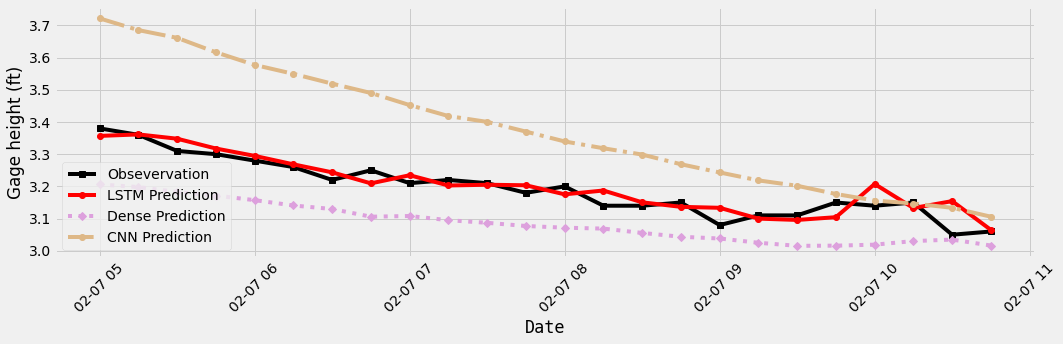

Dense
0.01275017457559969
0.10689491669336953
[-0.66141086]
tf.Tensor(3.346566654440781, shape=(), dtype=float64)


CNN
0.04508405027842577
0.18391561071077986
[-4.87467491]
tf.Tensor(5.75785892421192, shape=(), dtype=float64)


LSTM
0.0012666262573574345
0.027116098006566353
[0.83495233]
WAPE: tf.Tensor(0.848925582192365, shape=(), dtype=float64)


In [135]:
plot_predictions(test_set[0:24],LSTMprediction[0:24],CNNprediction[0:24],Denseprediction[0:24])

In [133]:
test_set

,height
time,
2022-02-07 05:00:00,3.38
2022-02-07 05:15:00,3.36
2022-02-07 05:30:00,3.31
2022-02-07 05:45:00,3.30
2022-02-07 06:00:00,3.28
...,...
2022-02-09 15:45:00,2.39
2022-02-09 16:00:00,2.36
2022-02-09 16:15:00,2.37
